In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# plt.style.use('seaborn-poster')

%matplotlib inline

In [67]:
params = (0, 1, -1, 0)  # eager beaver. he gets excited by Juliet’s love for him, and
# is further spurred on by his own affectionate feelings for her.
# Center, endless cycle of love and hate
init_conditions = [[1.0, 1.0], [2.0, 2.0], [3.0, 3.0]]

In [10]:
params = (-1, 2, 2, -1) # cautious lover case 1: a**2 < b**2 
# the relationship always fizzles out to mutual indifference. The lesson
# seems to be that excessive caution can lead to apathy.
# 
init_conditions = [[-1.0, 4.0], [-4.0, 4.0], [-4.0, 1.0], [4.0, -1.0], [4.0, -4.0], [1.0, -4.0], [4.0, 4.0], [-4.0, -4.0]]

In [99]:
params = (-2, 1, 1, -2) # cautious lover case 1: a**2 > b**2 

# the lovers are more daring, or perhaps more sensitive to each other.
# Now the relationship is explosive. Depending on their feelings initially, their relationship
# either becomes a love fest or a war. In either case, all trajectories approach
# the line R 􀀞 J , so their feelings are eventually mutual
init_conditions = [[-1.0, 4.0], [-4.0, 4.0], [-4.0, 1.0], [4.0, -1.0], [4.0, -4.0], [1.0, -4.0], [4.0, 4.0], [-4.0, -4.0]]

$\dot{R}=aR+bJ, \dot{J}=-bR-aJ$

In [44]:
params = (2, 1, -1, -2) # Fire and Ice case 1 |a|>|b|:

# Do opposites attract?
# saddle point
init_conditions = [[-1.0, 4.0], [-4.0, 4.0], [-4.0, 1.0], [4.0, -1.0], [4.0, -4.0], [1.0, -4.0], [4.0, 4.0], [-4.0, -4.0],
                   [2.0, -5.0], [2.0, 5.0], [-2.0, -5.0], [-2.0, 5.0]]

In [41]:
params = (1, 2, -2, -1) # Fire and Ice case 2 |a|<|b|:

# Do opposites attract?
# center
init_conditions = [[-1.0, 4.0], [-4.0, 4.0], [-4.0, 1.0], [4.0, -1.0], [4.0, -4.0], [1.0, -4.0], [4.0, 4.0], [-4.0, -4.0],
                   [2.0, -5.0], [2.0, 5.0], [-2.0, -5.0], [-2.0, 5.0]]

$\dot{R}=0, \dot{J}=aR+bJ$

In [56]:
params = (0, 0, 2, 1) # Romeo the robot case 1 ab > 0

init_conditions = [[-4.0, 4.0], [4.0, -4.0], [-3.0, 3.0], [3.0, -3.0]]

In [60]:
params = (0, 0, 2, -1) # Romeo the robot case 2 ab < 0

init_conditions = [[-4.0, 4.0], [4.0, -4.0], [-3.0, 3.0], [3.0, -3.0]]

In [25]:
def romeo_juliet(z, t, a, b, c, d):
    """love model

    Args:
        z (list): list of parameters
        t (float): time
        a (float): parameter
        b (float): parameter
        c (float): parameter
        d (float): parameter

    Returns:
        list: list of parameters
    """
    R, J = z
    return [a*R + b*J, c*R + d*J]

In [14]:
def plot_phase_portrait(func, params, init_conditions, xlabel, ylabel, xlim, ylim):
    """plots phase portrait of a 2D system of ODEs

    Args:
        func (fucntion): fuction that returns the derivatives of the system
        params (list): list of parameters for the system
        init_conditions (list): list of initial conditions
        xlabel (string): label for x-axis
        ylabel (string): label for y-axis
        xlim (int): limits for x-axis
        ylim (int): limits for y-axis
    """
    x = np.linspace(-10, 10, 20)
    y = np.linspace(-10, 10, 20)
    xv, yv = np.meshgrid(x, y)
    
    t = 0
    
    U, V = np.zeros(xv.shape), np.zeros(yv.shape)
    
    nx, ny = xv.shape
    
    for i in range(nx):
        for j in range(ny):
            x = xv[i, j]
            y = yv[i, j]
            # yprime = f([x, y], t)
            U[i,j] = func([x, y], t, *params)[0]
            V[i,j] = func([x, y], t, *params)[1]    
    # plot
    fig, ax = plt.subplots(figsize=(6.0, 6.0))
    
    ax.quiver(xv, yv, U, V, color="C0", 
              angles='xy',
              scale_units='xy', scale=5, width=.015)
    
    ax.set(xlabel=xlabel, ylabel=ylabel, xlim=xlim, ylim=ylim)
    
    # for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    #     tspan = np.linspace(0, 50, 200)
    #     y0 = [0.0, y20]
    #     ys = odeint(f, y0, tspan)
    #     plt.plot(ys[:,0], ys[:,1], 'b-') # path
    #     plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    #     plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    
    for y0 in init_conditions:
        t_span = np.linspace(0, 15, 200)
        # sol = solve_ivp(romeo_juliet, [0, 200], [y0, y0], args=params, 
        #                 dense_output=True)
        sol = odeint(func, y0, t_span, args=params)
        plt.plot(sol[:,0], sol[:,1], 'r-') # path
        plt.plot([sol[0, 0]], [sol[0, 1]], 'o') # start
        plt.plot([sol[-1,0]], [sol[-1,1]], 's') # end
    
    plt.show()


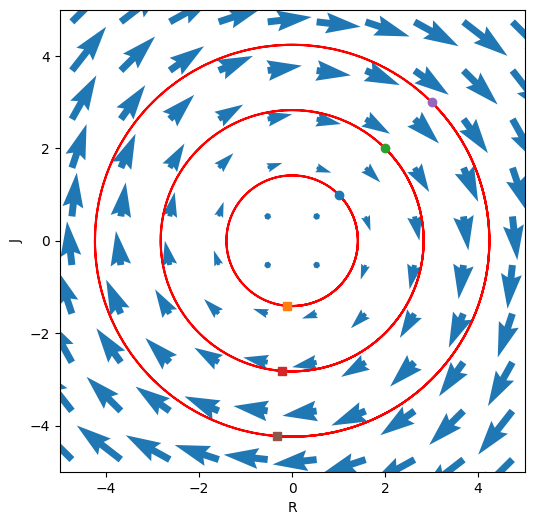

In [68]:
plot_phase_portrait(romeo_juliet, params, init_conditions, 
                    xlabel='R', ylabel='J', xlim=(-5, 5), ylim=(-5, 5))

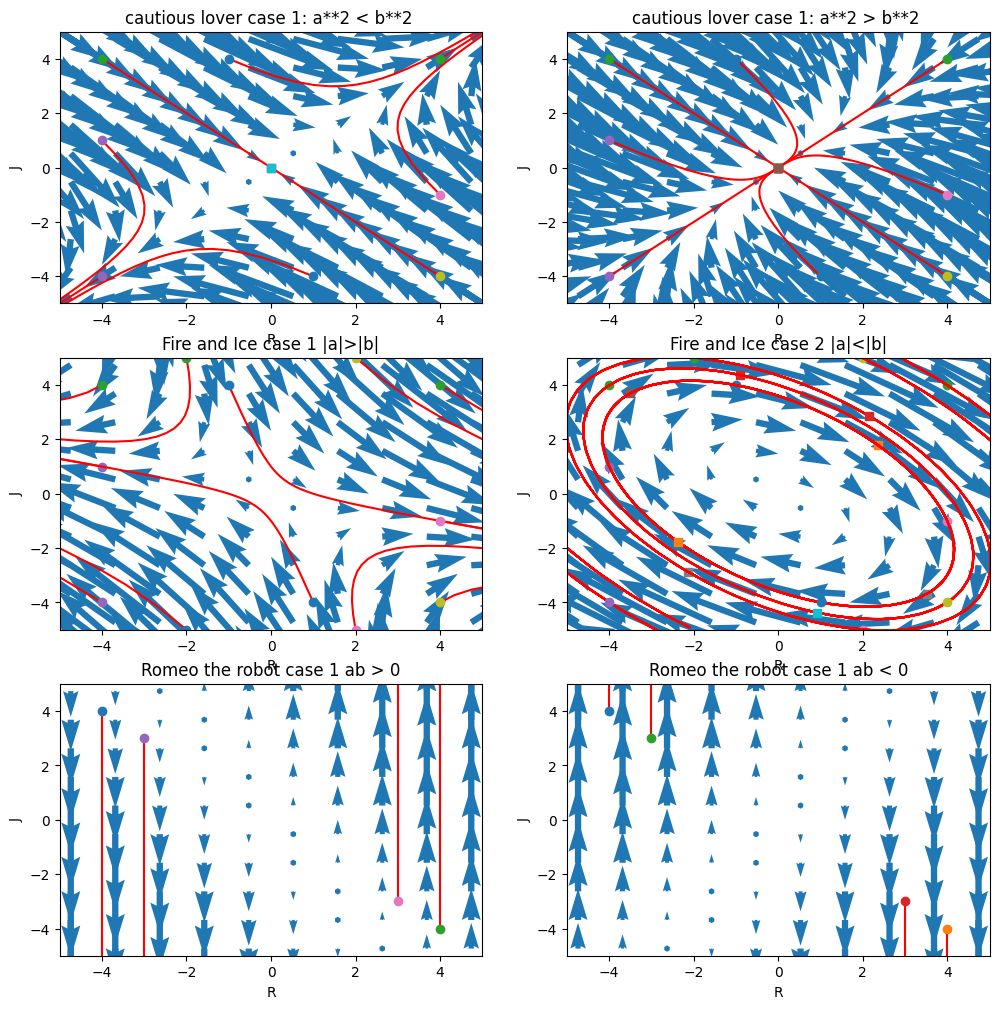

In [74]:
x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)
xv, yv = np.meshgrid(x, y)

t = 0

U, V = np.zeros(xv.shape), np.zeros(yv.shape)

nx, ny = xv.shape

# plot
fig, axs = plt.subplots(3, 2, figsize=(12.0, 12.0))

params = (-1, 2, 2, -1) # cautious lover case 1: a**2 < b**2 
# the relationship always fizzles out to mutual indifference. The lesson
# seems to be that excessive caution can lead to apathy.
# 
init_conditions = [[-1.0, 4.0], [-4.0, 4.0], [-4.0, 1.0], [4.0, -1.0], [4.0, -4.0], [1.0, -4.0], [4.0, 4.0], [-4.0, -4.0]]

for i in range(nx):
    for j in range(ny):
        x = xv[i, j]
        y = yv[i, j]
        # yprime = f([x, y], t)
        U[i,j] = romeo_juliet([x, y], t, *params)[0]
        V[i,j] = romeo_juliet([x, y], t, *params)[1]    
# first
axs[0, 0].quiver(xv, yv, U, V, color="C0",
                angles='xy',
                scale_units='xy', scale=5, width=.015)

axs[0, 0].set(xlabel='R', ylabel='J', xlim=(-5, 5), ylim=(-5, 5), title='cautious lover case 1: a**2 < b**2 ')

for y0 in init_conditions:
    t_span = np.linspace(0, 15, 200)
    sol = odeint(romeo_juliet, y0, t_span, args=params)
    axs[0, 0].plot(sol[:,0], sol[:,1], 'r-') # path
    axs[0, 0].plot([sol[0, 0]], [sol[0, 1]], 'o') # start
    axs[0, 0].plot([sol[-1,0]], [sol[-1,1]], 's') # end

# second

params = (-2, 1, 1, -2) # cautious lover case 2: a**2 > b**2 

# the lovers are more daring, or perhaps more sensitive to each other.
# Now the relationship is explosive. Depending on their feelings initially, their relationship
# either becomes a love fest or a war. In either case, all trajectories approach
# the line R 􀀞 J , so their feelings are eventually mutual
init_conditions = [[-1.0, 4.0], [-4.0, 4.0], [-4.0, 1.0], [4.0, -1.0], [4.0, -4.0], [1.0, -4.0], [4.0, 4.0], [-4.0, -4.0]]

for i in range(nx):
    for j in range(ny):
        x = xv[i, j]
        y = yv[i, j]
        # yprime = f([x, y], t)
        U[i,j] = romeo_juliet([x, y], t, *params)[0]
        V[i,j] = romeo_juliet([x, y], t, *params)[1]    

axs[0, 1].quiver(xv, yv, U, V, color="C0",
                angles='xy',
                scale_units='xy', scale=5, width=.015)

axs[0, 1].set(xlabel='R', ylabel='J', xlim=(-5, 5), ylim=(-5, 5), title='cautious lover case 1: a**2 > b**2 ')

for y0 in init_conditions:
    t_span = np.linspace(0, 15, 200)
    sol = odeint(romeo_juliet, y0, t_span, args=params)
    axs[0, 1].plot(sol[:,0], sol[:,1], 'r-') # path
    axs[0, 1].plot([sol[0, 0]], [sol[0, 1]], 'o') # start
    axs[0, 1].plot([sol[-1,0]], [sol[-1,1]], 's') # end
# third
params = (2, 1, -1, -2) # Fire and Ice case 1 |a|>|b|:

# Do opposites attract?
# saddle point
init_conditions = [[-1.0, 4.0], [-4.0, 4.0], [-4.0, 1.0], [4.0, -1.0], [4.0, -4.0], [1.0, -4.0], [4.0, 4.0], [-4.0, -4.0],
                   [2.0, -5.0], [2.0, 5.0], [-2.0, -5.0], [-2.0, 5.0]]

for i in range(nx):
    for j in range(ny):
        x = xv[i, j]
        y = yv[i, j]
        # yprime = f([x, y], t)
        U[i,j] = romeo_juliet([x, y], t, *params)[0]
        V[i,j] = romeo_juliet([x, y], t, *params)[1]    

axs[1, 0].quiver(xv, yv, U, V, color="C0",
                angles='xy',
                scale_units='xy', scale=5, width=.015)

axs[1, 0].set(xlabel='R', ylabel='J', xlim=(-5, 5), ylim=(-5, 5), title='Fire and Ice case 1 |a|>|b|')
    
for y0 in init_conditions:
    t_span = np.linspace(0, 15, 200)
    sol = odeint(romeo_juliet, y0, t_span, args=params)
    axs[1, 0].plot(sol[:,0], sol[:,1], 'r-') # path
    axs[1, 0].plot([sol[0, 0]], [sol[0, 1]], 'o') # start
    axs[1, 0].plot([sol[-1,0]], [sol[-1,1]], 's') # end
# fourth

params = (1, 2, -2, -1) # Fire and Ice case 2 |a|<|b|:

# Do opposites attract?
# center
init_conditions = [[-1.0, 4.0], [-4.0, 4.0], [-4.0, 1.0], [4.0, -1.0], [4.0, -4.0], [1.0, -4.0], [4.0, 4.0], [-4.0, -4.0],
                   [2.0, -5.0], [2.0, 5.0], [-2.0, -5.0], [-2.0, 5.0]]

for i in range(nx):
    for j in range(ny):
        x = xv[i, j]
        y = yv[i, j]
        # yprime = f([x, y], t)
        U[i,j] = romeo_juliet([x, y], t, *params)[0]
        V[i,j] = romeo_juliet([x, y], t, *params)[1]    

axs[1, 1].quiver(xv, yv, U, V, color="C0",
                angles='xy',
                scale_units='xy', scale=5, width=.015)

axs[1, 1].set(xlabel='R', ylabel='J', xlim=(-5, 5), ylim=(-5, 5), title='Fire and Ice case 2 |a|<|b|')


for y0 in init_conditions:
    t_span = np.linspace(0, 15, 200)
    sol = odeint(romeo_juliet, y0, t_span, args=params)
    axs[1, 1].plot(sol[:,0], sol[:,1], 'r-') # path
    axs[1, 1].plot([sol[0, 0]], [sol[0, 1]], 'o') # start
    axs[1, 1].plot([sol[-1,0]], [sol[-1,1]], 's') # end
# fifth
params = (0, 0, 2, 1) # Romeo the robot case 1 ab > 0

init_conditions = [[-4.0, 4.0], [4.0, -4.0], [-3.0, 3.0], [3.0, -3.0]]
for i in range(nx):
    for j in range(ny):
        x = xv[i, j]
        y = yv[i, j]
        # yprime = f([x, y], t)
        U[i,j] = romeo_juliet([x, y], t, *params)[0]
        V[i,j] = romeo_juliet([x, y], t, *params)[1]    

axs[2, 0].quiver(xv, yv, U, V, color="C0",
                angles='xy',
                scale_units='xy', scale=5, width=.015)

axs[2, 0].set(xlabel='R', ylabel='J', xlim=(-5, 5), ylim=(-5, 5), title='Romeo the robot case 1 ab > 0')

for y0 in init_conditions:
    t_span = np.linspace(0, 15, 200)
    sol = odeint(romeo_juliet, y0, t_span, args=params)
    axs[2, 0].plot(sol[:,0], sol[:,1], 'r-') # path
    axs[2, 0].plot([sol[0, 0]], [sol[0, 1]], 'o') # start
    axs[2, 0].plot([sol[-1,0]], [sol[-1,1]], 's') # end
# sixth
params = (0, 0, -2, 1) # Romeo the robot case 2 ab < 0

init_conditions = [[-4.0, 4.0], [4.0, -4.0], [-3.0, 3.0], [3.0, -3.0]]

for i in range(nx):
    for j in range(ny):
        x = xv[i, j]
        y = yv[i, j]
        # yprime = f([x, y], t)
        U[i,j] = romeo_juliet([x, y], t, *params)[0]
        V[i,j] = romeo_juliet([x, y], t, *params)[1]    

axs[2, 1].quiver(xv, yv, U, V, color="C0",
                angles='xy',
                scale_units='xy', scale=5, width=.015)

axs[2, 1].set(xlabel='R', ylabel='J', xlim=(-5, 5), ylim=(-5, 5), title='Romeo the robot case 1 ab < 0')

for y0 in init_conditions:
    t_span = np.linspace(0, 15, 200)
    sol = odeint(romeo_juliet, y0, t_span, args=params)
    axs[2, 1].plot(sol[:,0], sol[:,1], 'r-') # path
    axs[2, 1].plot([sol[0, 0]], [sol[0, 1]], 'o') # start
    axs[0, 1].plot([sol[-1,0]], [sol[-1,1]], 's') # end

plt.show()
# plt.savefig('love_dynamics_6.jpg')


In [71]:
def rhett_scarlett(z, t, A_s, A_r, k):
    """dynamics of love between Rhett and Scarlett

    Args:
        z (float): current state of the system
        t (float): current time
        A_s (float): Attraction of Scarlett
        A_r (float): Attraction of Rhett
        k (float): constant

    Returns:
        list: derivatives of the system
    """
    R, S = z
    return [-R + A_s + k*S*math.exp(-S), -S + A_r + k*R*math.exp(-R)]

In [75]:
params = (1.2, 1, 15)
init_conditions = [[0.0, 0.0], [1.0, 10.0], [10.0, 1.0], [10.0, 4.0], [4.0, 10.0], [6.0, 10.0], [10.0, 6.0], [0.0, 2.0], [2.0, 0.0], 
                   [10.0, 10.0]]

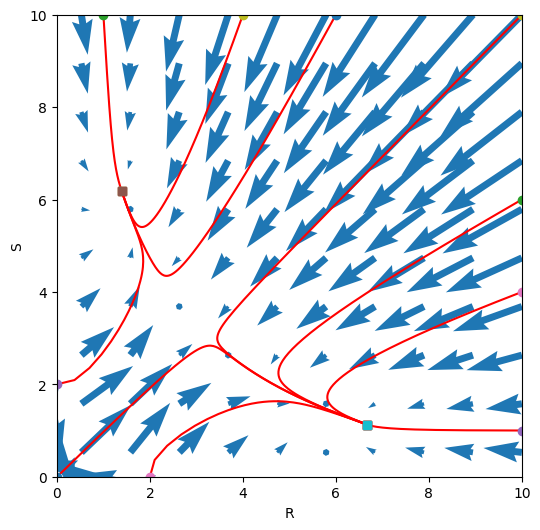

In [76]:
plot_phase_portrait(rhett_scarlett, params, init_conditions, xlabel='R', ylabel='S', xlim=(0, 10), ylim=(0, 10))